<a href="https://colab.research.google.com/github/taeheee-kim/deep_learning_practice/blob/master/Introduction_of_AI_LR_to_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression

In [ ]:
import torch
import torch.optim as optim

x_data = [[1,2],
          [2,3],
          [3,1],
          [4,3],
          [5,3],
          [6,2]]

y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr=1)

nb_epochs = 1000

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()


    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

if epoch == nb_epochs:
    prediction = hypothesis >= torch.FloatTensor([0.5])
    print(prediction)

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


## Logistic Regression with NN Module

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

x_data = [[1,2],
          [2,3],
          [3,1],
          [4,3],
          [5,3],
          [6,2]]

y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = BinaryClassifier()

optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    hypothesis = model(x_train)
    cost = F.binary_cross_entropy(hypothesis, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()


    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(epoch, nb_epochs, cost.item(), accuracy * 100))

Epoch    0/1000 Cost: 0.782701 Accuracy 50.00%
Epoch   10/1000 Cost: 0.455712 Accuracy 66.67%
Epoch   20/1000 Cost: 0.464168 Accuracy 66.67%
Epoch   30/1000 Cost: 0.390357 Accuracy 83.33%
Epoch   40/1000 Cost: 0.331176 Accuracy 83.33%
Epoch   50/1000 Cost: 0.279423 Accuracy 83.33%
Epoch   60/1000 Cost: 0.232532 Accuracy 100.00%
Epoch   70/1000 Cost: 0.191559 Accuracy 100.00%
Epoch   80/1000 Cost: 0.162585 Accuracy 100.00%
Epoch   90/1000 Cost: 0.147155 Accuracy 100.00%
Epoch  100/1000 Cost: 0.136820 Accuracy 100.00%
Epoch  110/1000 Cost: 0.127995 Accuracy 100.00%
Epoch  120/1000 Cost: 0.120259 Accuracy 100.00%
Epoch  130/1000 Cost: 0.113423 Accuracy 100.00%
Epoch  140/1000 Cost: 0.107336 Accuracy 100.00%
Epoch  150/1000 Cost: 0.101884 Accuracy 100.00%
Epoch  160/1000 Cost: 0.096970 Accuracy 100.00%
Epoch  170/1000 Cost: 0.092520 Accuracy 100.00%
Epoch  180/1000 Cost: 0.088470 Accuracy 100.00%
Epoch  190/1000 Cost: 0.084768 Accuracy 100.00%
Epoch  200/1000 Cost: 0.081371 Accuracy 100.00

## Softmax Classification

In [ ]:
#learning rate = 0.5
import torch
import torch.optim as optim

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]

y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 0.5)

W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 0.549306
Epoch  100/1000 Cost: 0.345172
Epoch  200/1000 Cost: 0.307202
Epoch  300/1000 Cost: 0.285251
Epoch  400/1000 Cost: 0.269813
Epoch  500/1000 Cost: 0.257785
Epoch  600/1000 Cost: 0.247828
Epoch  700/1000 Cost: 0.239258
Epoch  800/1000 Cost: 0.231684
Epoch  900/1000 Cost: 0.224862
Epoch 1000/1000 Cost: 0.218631


In [ ]:
#learning rate = 0.1
import torch
import torch.optim as optim

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]

y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 0.1)

W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 0.109861
Epoch  100/1000 Cost: 0.085082
Epoch  200/1000 Cost: 0.078491
Epoch  300/1000 Cost: 0.074459
Epoch  400/1000 Cost: 0.071465
Epoch  500/1000 Cost: 0.069069
Epoch  600/1000 Cost: 0.067078
Epoch  700/1000 Cost: 0.065383
Epoch  800/1000 Cost: 0.063912
Epoch  900/1000 Cost: 0.062618
Epoch 1000/1000 Cost: 0.061464


## Softmax Classification with NN Module

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3)

    def forward(self, x):
        return self.linear(x)

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)

model = SoftmaxClassifierModel()
optimizer = optim.Adam(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    prediction = model(x_train)
    cost = F.cross_entropy(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 2.865484
Epoch  100/1000 Cost: 0.331276
Epoch  200/1000 Cost: 0.214730
Epoch  300/1000 Cost: 0.147977
Epoch  400/1000 Cost: 0.108013
Epoch  500/1000 Cost: 0.082336
Epoch  600/1000 Cost: 0.064835
Epoch  700/1000 Cost: 0.052357
Epoch  800/1000 Cost: 0.043142
Epoch  900/1000 Cost: 0.036142
Epoch 1000/1000 Cost: 0.030699


## Regularization

총 배치의 수 : 600
[Epoch:    1] cost = 0.265549093
[Epoch:    2] cost = 0.0955918431
[Epoch:    3] cost = 0.0623133369
[Epoch:    4] cost = 0.042559851
[Epoch:    5] cost = 0.0322850607
[Epoch:    6] cost = 0.0237160753
[Epoch:    7] cost = 0.0210654642
[Epoch:    8] cost = 0.0186767541
[Epoch:    9] cost = 0.0147612207
[Epoch:   10] cost = 0.0115683805
[Epoch:   11] cost = 0.0137381619
[Epoch:   12] cost = 0.0113736456
[Epoch:   13] cost = 0.00864754803
[Epoch:   14] cost = 0.0123699969
[Epoch:   15] cost = 0.0100851152


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9768000245094299


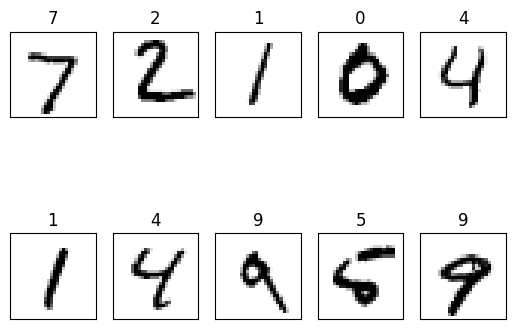

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

import matplotlib.pyplot as plt

class DNN(torch.nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.fc1(x.view(-1, 784)))
        out = self.relu(self.fc2(out))
        out = self.fc3(out)
        return out

learning_rate = 0.001
training_epochs = 15
batch_size = 100

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

model = DNN()

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

with torch.no_grad():
    model.eval()
    X_test = mnist_test.test_data.view(len(mnist_test), 1 * 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = model(X_test)
    prediction = torch.argmax(prediction, 1)
    correct_prediction = prediction == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    fig = plt.figure()
    for i in range(10):
        subplot = fig.add_subplot(2, 5, i + 1)

        subplot.set_xticks([])
        subplot.set_yticks([])

        subplot.set_title('%d' % prediction[i])
        subplot.imshow(X_test[i].reshape((28, 28)),
                       cmap=plt.cm.gray_r)
    plt.show()

## CNN

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)  # 전결합층을 위해서 Flatten
        out = self.fc(out)
        return out

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

if device == 'cuda':
    torch.cuda.manual_seed_all(777)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

model = CNN().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

총 배치의 수 : 600
[Epoch:    1] cost = 0.217296466
[Epoch:    2] cost = 0.0576543435
[Epoch:    3] cost = 0.0427408144
[Epoch:    4] cost = 0.0344967134
[Epoch:    5] cost = 0.0285993256
[Epoch:    6] cost = 0.0247306935
[Epoch:    7] cost = 0.0219664965
[Epoch:    8] cost = 0.0175395068
[Epoch:    9] cost = 0.0155572006
[Epoch:   10] cost = 0.0130234016
[Epoch:   11] cost = 0.0111826826
[Epoch:   12] cost = 0.00940733682
[Epoch:   13] cost = 0.00759225991
[Epoch:   14] cost = 0.00745917019
[Epoch:   15] cost = 0.007038143
Accuracy: 0.98580002784729


## RNN

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = torch.nn.Linear(hidden_size, output_size, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [ ]:
import numpy as np

input_str = 'hihell'
label_str = 'ihello'
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

input_size = vocab_size # 입력의 크기 = 문자 집합의 크기
hidden_size = 5
output_size = 5
learning_rate = 0.1

char_to_index = dict((c, i) for i, c in enumerate(char_vocab))
print(char_to_index)

index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key
print(index_to_char)

x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data)
print(y_data)


x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

문자 집합의 크기 : 5
{'e': 0, 'h': 1, 'i': 2, 'l': 3, 'o': 4}
{0: 'e', 1: 'h', 2: 'i', 3: 'l', 4: 'o'}
[1, 2, 1, 0, 3, 3]
[2, 1, 0, 3, 3, 4]
[[1, 2, 1, 0, 3, 3]]
[[2, 1, 0, 3, 3, 4]]
[array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])]
훈련 데이터의 크기 : torch.Size([1, 6, 5])
레이블의 크기 : torch.Size([1, 6])


<ipython-input-20-3fff8f66f616>:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  X = torch.FloatTensor(x_one_hot)


In [ ]:
net = Net(input_size, hidden_size, output_size)
outputs = net(X)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    result = outputs.data.numpy().argmax(axis=2)
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.5443462133407593 prediction:  [[0 3 0 3 4 3]] true Y:  [[2, 1, 0, 3, 3, 4]] prediction str:  elelol
1 loss:  1.3840551376342773 prediction:  [[3 1 3 3 3 3]] true Y:  [[2, 1, 0, 3, 3, 4]] prediction str:  lhllll
2 loss:  1.2196571826934814 prediction:  [[3 1 0 3 3 3]] true Y:  [[2, 1, 0, 3, 3, 4]] prediction str:  lhelll
3 loss:  1.0671108961105347 prediction:  [[0 1 0 3 3 4]] true Y:  [[2, 1, 0, 3, 3, 4]] prediction str:  ehello
4 loss:  0.9101631045341492 prediction:  [[0 1 0 3 3 4]] true Y:  [[2, 1, 0, 3, 3, 4]] prediction str:  ehello
5 loss:  0.7525632977485657 prediction:  [[0 1 0 3 3 4]] true Y:  [[2, 1, 0, 3, 3, 4]] prediction str:  ehello
6 loss:  0.6184913516044617 prediction:  [[0 1 0 3 3 4]] true Y:  [[2, 1, 0, 3, 3, 4]] prediction str:  ehello
7 loss:  0.4966677725315094 prediction:  [[0 1 0 3 3 4]] true Y:  [[2, 1, 0, 3, 3, 4]] prediction str:  ehello
8 loss:  0.3975163996219635 prediction:  [[2 1 0 3 3 4]] true Y:  [[2, 1, 0, 3, 3, 4]] prediction str:  ihello
9

In [ ]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {c: i for i, c in enumerate(char_set)}

print(char_dic)
dic_size = len(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

hidden_size = dic_size
sequence_length = 10  # 임의 숫자 지정
learning_rate = 0.1

# 데이터 구성
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index

print(x_data[0])
print(y_data[0])

x_one_hot = [np.eye(dic_size)[x] for x in x_data] # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

print(X[0])

{'o': 0, 'p': 1, 'm': 2, 'g': 3, 'b': 4, 'h': 5, 'l': 6, ',': 7, 'k': 8, '.': 9, 's': 10, 'y': 11, "'": 12, 'c': 13, 'r': 14, 'a': 15, 'f': 16, 'i': 17, 't': 18, 'u': 19, 'd': 20, ' ': 21, 'w': 22, 'n': 23, 'e': 24}
문자 집합의 크기 : 25
0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [ ]:
net = Net(dic_size, hidden_size, 2) # 이번에는 층을 두 개 쌓습니다.
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

outputs = net(X)

for i in range(100):
    optimizer.zero_grad()
    outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    # results의 텐서 크기는 (170, 10)
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오지만
            predict_str += ''.join([char_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += char_set[result[-1]]

    print(predict_str)

rprrgrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrprrrrrrrprrrrrrrrrrrrrrrrrrrrgrprrrrrrrrrrrrrrprrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrprrrrr
  t                         t                             t               t                t    t     t                    t          t           t           t            t       
                                                                                                                                                                                   
tib..n of.,b....e.....,.,.nbt.,.eht.,hnb....,..,.....,tf.,ba...nb.,b.....ib.....,.eb..,.e.,b...,b.....i.,...,.,bb...e.,.i',b....eb.,.,.....nb.......,.i',.es,.....tb.........eb,.,.
tehehihehiiiieihiieihiihiiihihehihiiihiiehihieiihiieiiiihiheeieehiihiihiiiiiiihieiiiiiihiiihiiiiiehihihiihieiiiiiiihiiiiihihehihihiihiieeihehiiheiieiiihiiehihiiiiieiiihieiieiiiiii
tortntttnttttetnttetntttttenttenttttenentnttteettttenttentttettenttnttteettettntettttttntntttetettnt